## fkpt code

In [1]:
#import standard libraries
import matplotlib
import matplotlib.pyplot as plt

#fkpt code
from use_fkpt import *
from use_fkpt_AP import *

#### Inputs

Set the *cosmological parameters* ($h, \Omega_m, z$) for the input real space linear power spectrum.

In [2]:
h = 0.67                   #h = H0/100
Om = 0.29                  #matter density
z_pk = 0.5                 #redshift

Define a vector for the *nuisances parameters*: 

NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alpha0shot, alpha2shot, pshotp]

In [3]:
#bias parameters
b1 = 1.70               
b2 = -0.45
bs2 = -4/7*(b1 - 1)
b3nl = 32/315*(b1 - 1)

#EFT parameters
alpha0 = 3.0               #units: [Mpc/h]^2              
alpha2 = -29.0             #units: [Mpc/h]^2
alpha4 = 0.0               #units: [Mpc/h]^2
ctilde = 0.0               #units: [Mpc/h]^4

#Stochatics parameters
alpha0shot = 0.08
alpha2shot = -8.0          #units: [Mpc/h]^2
pshotp = 5000              #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, 
                ctilde, alpha0shot, alpha2shot, pshotp]

#### Running the fkpt code

Read the corresponding linear power spectrum file. It can also be computed using an Einstein-Boltzmann code like CAMB, CLASS, etc. In this example, we show the former case. 


The input linear power spectrum should be the LCDM one and given in a two column *(k,pkl)* file in *Mpc/h* units at the desired output redshift. This file must be added inside the *'Input'* folder. To read it, write the file's name in **'pk_name = name_of_file'**, as shown below.

The *fkpt* code can be executed for two different models: the usual LCDM **(model = 'LCDM')** and the Hu-Sawicky **(model = 'HS')**. 

Let's compute the 1-loop redshift space power spectrum for different configurations: with and without Alcock-Paczyński (AP) effect. 

In [4]:
#running fkpt for LCDM model without AP test 
fkpt_LCDM = run_fkpt(pk_name = 'pkl_z05.dat',
                     zout = z_pk, Om = Om, h = h,
                     b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                     alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4, 
                     ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                     model = 'LCDM')


 		 Gaussian streaming model code for the redshift space 2PCF 

Reading pkl from file pkl_z05.dat in the form column1: k[h/Mpc], 2: pkl[Mpc/h]^3 

redshift: z=0.5
OmegaM=0.29
h=0.67
b1=1.7
b2=-0.45
bs2=-0.4
b3nl=0.071111
alpha0=3
alpha2=-29
alpha4=0
ctilde=0
Pshotp=5000
alpha0shot=0.08
alpha2shot=-8

A_LCDM=1.00382, Ap_LCDM=0.00904509, KR1_LCDM = 1.00724, KR1p_LCDM = 1.01698
sigma quadratures from kmin = 1e-05 to kmax = 402.455
s2psi = 22.2008,   s2v = 22.2008,   Sigma2 = 20.7966,   deltaSigma2 = 5.29432
s2psi = 22.2008,   s2v = 22.2008,   Sigma2 = 20.7966,   deltaSigma2 = 5.29432
k-functions: Nk=120 values from kmin=0.001 to kmax=0.5 ...time = 0.181121 seconds
rsd:  computing... ...time = 0.000708 seconds 

z = 0.5
Dplus = 0.776117
f0 = 0.741013
2*sigma_psi = 0  Mpc/h (Lagrangian particles mean displacement)

Total time : 0.204809 seconds



**To include the AP test:**

- set a fiducial value for $\Omega^{AP}_m$. 

- update the Outputs files using the function *update_kfunctions*, as shown below.

- compute the RSD multipoles with AP using the function *RSDmultipoles*, set 'AP = True'.

In [5]:
OmAP = 0.31                                       #Fiducial value (for AP test!)
update_kfuncs = update_kfunctions(zout = z_pk)    #Update the Outputs files

In [6]:
#running fkpt for LCDM model with AP test 
kh, Pk0LCDM_AP, Pk2LCDM_AP, Pk4LCDM_AP = RSDmultipoles(kev = fkpt_LCDM['k'], NuisanParams = NuisanParams, 
                                                       z_pk = z_pk, OmM = Om, Omfid = OmAP, AP = True)

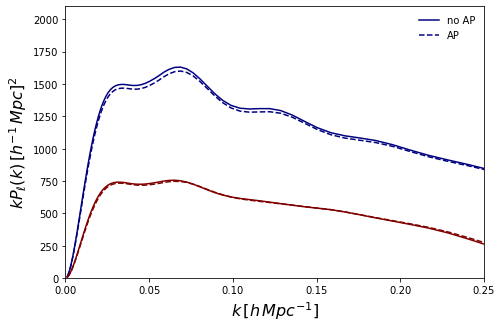

In [7]:
#plots
fig, axs = plt.subplots(figsize = (7.5, 5.0))
axs.set_xlabel(r'$k \, [h\, {Mpc}^{-1}]$', fontsize =  16);
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \, {Mpc}]^2$', fontsize =  16);

#monopole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['mono'], 
         color = 'navy', label=r'no AP');

axs.plot(kh, kh * Pk0LCDM_AP, 
         color = 'navy', ls = '--', label=r'AP');

#quadrupole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['quad'], 
         color = 'maroon');

axs.plot(kh, kh * Pk2LCDM_AP, 
         color = 'maroon', ls = '--');

axs.set_xlim([0.0, 0.25]);
axs.set_ylim([0, 2100]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);
#plt.savefig("fkpt_AP.pdf")

**Hu-Sawicky model in fkpt**

To run the fkpt code with the Hu-Sawicky model, just set **(model = 'HS')** and add the corresponding *fR0* value.

Let's compute the 1-loop redshift space power spectrum for different configurations:

In [8]:
fkpt_F4 = run_fkpt(pk_name = 'pkl_z05.dat', 
                   zout = z_pk, Om = Om, h = h, 
                   b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                   alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4, 
                   ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                   model = 'HS', fR0 = 1e-4)


 		 Gaussian streaming model code for the redshift space 2PCF 

Reading pkl from file pkl_z05.dat in the form column1: k[h/Mpc], 2: pkl[Mpc/h]^3 

redshift: z=0.5
OmegaM=0.29
h=0.67
b1=1.7
b2=-0.45
bs2=-0.4
b3nl=0.071111
alpha0=3
alpha2=-29
alpha4=0
ctilde=0
Pshotp=5000
alpha0shot=0.08
alpha2shot=-8

A_LCDM=1.00382, Ap_LCDM=0.00904509, KR1_LCDM = 1.00724, KR1p_LCDM = 1.01698
sigma quadratures from kmin = 1e-05 to kmax = 402.455
s2psi = 24.9426,   s2v = 30.2345,   Sigma2 = 22.8898,   deltaSigma2 = 5.43744
s2psi = 24.9426,   s2v = 30.2345,   Sigma2 = 22.8898,   deltaSigma2 = 5.43744
k-functions: Nk=120 values from kmin=0.001 to kmax=0.5 ...time = 0.162426 seconds
rsd:  computing... ...time = 0.000653 seconds 

z = 0.5
Dplus = 0.776117
f0 = 0.741013
2*sigma_psi = 0  Mpc/h (Lagrangian particles mean displacement)

Total time : 0.191268 seconds



In [9]:
fkpt_F10 = run_fkpt(pk_name = 'pkl_z05.dat', 
                   zout = z_pk, Om = Om, h = h, 
                   b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                   alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4, 
                   ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                   model = 'HS', fR0 = 1e-10)


 		 Gaussian streaming model code for the redshift space 2PCF 

Reading pkl from file pkl_z05.dat in the form column1: k[h/Mpc], 2: pkl[Mpc/h]^3 

redshift: z=0.5
OmegaM=0.29
h=0.67
b1=1.7
b2=-0.45
bs2=-0.4
b3nl=0.071111
alpha0=3
alpha2=-29
alpha4=0
ctilde=0
Pshotp=5000
alpha0shot=0.08
alpha2shot=-8

A_LCDM=1.00382, Ap_LCDM=0.00904509, KR1_LCDM = 1.00724, KR1p_LCDM = 1.01698
sigma quadratures from kmin = 1e-05 to kmax = 402.455
s2psi = 22.2013,   s2v = 22.2028,   Sigma2 = 20.7966,   deltaSigma2 = 5.29431
s2psi = 22.2013,   s2v = 22.2028,   Sigma2 = 20.7966,   deltaSigma2 = 5.29431
k-functions: Nk=120 values from kmin=0.001 to kmax=0.5 ...time = 0.17176 seconds
rsd:  computing... ...time = 0.000615 seconds 

z = 0.5
Dplus = 0.776117
f0 = 0.741013
2*sigma_psi = 0  Mpc/h (Lagrangian particles mean displacement)

Total time : 0.200176 seconds



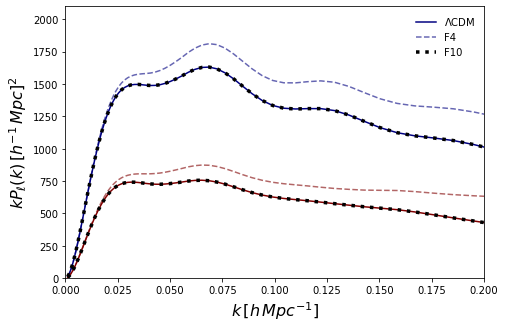

In [10]:
#plots
fig, axs = plt.subplots(figsize = (7.5, 5.0))
axs.set_xlabel(r'$k \, [h\, {Mpc}^{-1}]$', fontsize =  16);
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \, {Mpc}]^2$', fontsize =  16);

#monopole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['mono'], 
         color = 'navy', label=r'$\Lambda$CDM');

axs.plot(fkpt_F4['k'], fkpt_F4['k'] * fkpt_F4['mono'], 
         color = 'navy', ls = '--', label=r'F4', alpha = 0.6);

axs.plot(fkpt_F10['k'], fkpt_F10['k'] * fkpt_F10['mono'],
         color = 'k', ls = ':', label=r'F10', lw = 3.5)

#quadrupole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['quad'], 
         color = 'maroon');

axs.plot(fkpt_F4['k'], fkpt_F4['k'] * fkpt_F4['quad'], 
         color = 'maroon', ls = '--', alpha = 0.6);

axs.plot(fkpt_F10['k'], fkpt_F10['k'] * fkpt_F10['quad'],
         color = 'k', ls = ':', lw = 3.5);

axs.set_xlim([0.0, 0.2]);
axs.set_ylim([0, 2100]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);
#plt.savefig("fkpt_HS.pdf")

Intermediate computations are automatically stored in a folder called *Ouput*, there are the linear and non-linear results for the wiggle and non-wiggle (nw) terms.